Will create a decision tree regressor model to predict the salary of current NBA players based on career stats, all star appearances, etc.

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [120]:
player_names = []
url = "https://www.basketball-reference.com/contracts/players.html"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')
#print(soup.prettify())

Lebron shows up twice

Get each players name

In [121]:
player_html_tags = soup.find_all("td", {"data-stat" : "player"})
player_html_tags
player_names = [name.text for name in player_html_tags]
#player_names

Get the unique link to each players stats page

In [122]:
stats_list = []
for i in range(len(player_html_tags)):
    stats_list.append(player_html_tags[i].select('a[href]')[0]["href"])
stats_list[:5]

['/players/c/curryst01.html',
 '/players/p/paulch01.html',
 '/players/j/jamesle01.html',
 '/players/w/westbru01.html',
 '/players/g/griffbl01.html']

Get the salary for each player

In [123]:
salary_tags = soup.find_all("td", {"data-stat" : "y1"})
salary_list = []
for i in range(len(salary_tags)):
    salary_list.append(int(str(salary_tags[i]).split()[3].split('"')[1]))
#salary_list

Features that will be extracted from the website

In [124]:
def nan_handler(text):            
    try:
        return float(text)
    except ValueError:
        return 0.0

In [125]:
games_played = []
games_started = []
avg_minutes = []
made_field_goals = []
field_goal_attempts = []
field_goal_percent = []
three_point_makes = []
three_point_attempts = []
three_point_percent = []
two_point_makes = []
two_point_attempts = []
two_point_percent = []
eff_field_goal_percent = []
free_throw_makes = []
free_throw_attempts = []
free_throw_percent = []
off_rebounds = []
def_rebounds = []
total_rebounds = []
assists = []
steals = []
blocks = []
turnovers = []
points = []

master_list = [games_played, games_started, avg_minutes, made_field_goals, field_goal_attempts,
                field_goal_percent, three_point_makes, three_point_attempts, three_point_percent, 
                two_point_makes, two_point_attempts, two_point_percent, eff_field_goal_percent,
                free_throw_makes, free_throw_attempts, free_throw_percent, off_rebounds, def_rebounds,
                total_rebounds, assists, steals, blocks, turnovers, points]

In [126]:
#Loop through the list of unique websites for each player
for i,website in enumerate(stats_list):
    site = "https://www.basketball-reference.com" + website
    player_soup = BeautifulSoup(requests.get(site).text, "html5lib")
    
    #Player might be a rookie
    try:
        career_stats = player_soup.find_all("tfoot")[0].select("td")
    except IndexError:
        for lst in master_list:
            lst.append(0.0)
        continue
        
    games_played.append(nan_handler(career_stats[4].text))
    games_started.append(nan_handler(career_stats[5].text))
    avg_minutes.append(nan_handler(career_stats[6].text))
    made_field_goals.append(nan_handler(career_stats[7].text))
    field_goal_attempts.append(nan_handler(career_stats[8].text))        
    three_point_makes.append(nan_handler(career_stats[10].text))
    three_point_attempts.append(nan_handler(career_stats[11].text))        
    two_point_makes.append(nan_handler(career_stats[13].text))
    two_point_attempts.append(nan_handler(career_stats[14].text))        
    eff_field_goal_percent.append(nan_handler(career_stats[16].text))
    free_throw_makes.append(nan_handler(career_stats[17].text))
    free_throw_attempts.append(nan_handler(career_stats[18].text))      
    off_rebounds.append(nan_handler(career_stats[20].text))
    def_rebounds.append(nan_handler(career_stats[21].text))
    total_rebounds.append(nan_handler(career_stats[22].text))
    assists.append(nan_handler(career_stats[23].text))
    steals.append(nan_handler(career_stats[24].text))
    blocks.append(nan_handler(career_stats[25].text))
    turnovers.append(nan_handler(career_stats[26].text))
    points.append(nan_handler(career_stats[28].text))
    field_goal_percent.append(nan_handler(career_stats[9].text))
    free_throw_percent.append(nan_handler(career_stats[19].text))
    two_point_percent.append(nan_handler(career_stats[15].text))
    three_point_percent.append(nan_handler(career_stats[12].text))

Will remove all rookies from the data

In [127]:
cols = ["Name", "PPG", "AST", "BLK", "TO", "STL", "REB", "OREB", "DREB", "GP", "GS", "MPG", "FGA", "FG", "FG%", "3PA",
        "3P", "3P%", "FTA", "FT", "FT%", "2PA", "2P", "2P%", "EFG%", "Salary"]

#Transpose the dataframes
data = pd.DataFrame([player_names, points, assists, blocks, turnovers, steals, total_rebounds, off_rebounds, def_rebounds,
                     games_played, games_started, avg_minutes, field_goal_attempts, made_field_goals, field_goal_percent,
                     three_point_attempts, three_point_makes, three_point_percent, free_throw_attempts, free_throw_makes, 
                     free_throw_percent, two_point_attempts, two_point_makes, two_point_percent, eff_field_goal_percent, 
                     salary_list]).T
data.columns=cols
data.head()

,Name,PPG,AST,BLK,TO,STL,REB,OREB,DREB,GP,...,3P,3P%,FTA,FT,FT%,2PA,2P,2P%,EFG%,Salary
0,Stephen Curry,23.1,6.8,0.2,3.2,1.8,4.4,0.7,3.7,625,...,3.4,0.436,4,3.6,0.903,9,4.6,0.513,0.579,37457154
1,Chris Paul,18.7,9.8,0.1,2.4,2.3,4.5,0.7,3.8,892,...,1.3,0.372,4.9,4.3,0.868,10.5,5.3,0.505,0.518,35654150
2,LeBron James,27.2,7.2,0.8,3.5,1.6,7.4,1.2,6.1,1143,...,1.4,0.344,8.1,6,0.739,15.5,8.5,0.547,0.54,35654150
3,Russell Westbrook,23,8.2,0.3,4,1.7,6.6,1.7,4.9,748,...,1.1,0.311,7.2,5.9,0.814,15,6.9,0.464,0.464,35350000
4,Blake Griffin,21.5,4.3,0.5,2.5,0.9,9.2,2.3,6.9,529,...,0.4,0.324,6.9,4.7,0.683,15,7.8,0.522,0.519,31873932


In [128]:
print(len(data.Name))

473


In [129]:
#data.iloc[319, :]
#data[data.GP == 0]
data = data.drop(data[data.GP == 0].index)

In [130]:
print(len(data.Name))

413


In [131]:
simplified_data = data[["Name", "PPG", "AST", "BLK", "TO", "STL", "REB", "MPG", "FT%", "EFG%", "Salary"]]
simplified_data.head()

,Name,PPG,AST,BLK,TO,STL,REB,MPG,FT%,EFG%,Salary
0,Stephen Curry,23.1,6.8,0.2,3.2,1.8,4.4,34.4,0.903,0.579,37457154
1,Chris Paul,18.7,9.8,0.1,2.4,2.3,4.5,35.3,0.868,0.518,35654150
2,LeBron James,27.2,7.2,0.8,3.5,1.6,7.4,38.8,0.739,0.54,35654150
3,Russell Westbrook,23,8.2,0.3,4,1.7,6.6,34.4,0.814,0.464,35350000
4,Blake Griffin,21.5,4.3,0.5,2.5,0.9,9.2,35,0.683,0.519,31873932


In [132]:
x = simplified_data[["PPG", "AST", "BLK", "TO", "STL", "REB", "MPG", "FT%", "EFG%"]]
y = simplified_data.Salary

x_train, x_test, y_train, y_test = train_test_split(x, y)

salary_model = DecisionTreeRegressor()
salary_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [133]:
predictions = salary_model.predict(x_test)

print(mean_absolute_error(y_test, predictions))

5854258.067307692


In [134]:
data.to_csv("NBA Players Info 2018.csv")

In [135]:
data.head()

,Name,PPG,AST,BLK,TO,STL,REB,OREB,DREB,GP,...,3P,3P%,FTA,FT,FT%,2PA,2P,2P%,EFG%,Salary
0,Stephen Curry,23.1,6.8,0.2,3.2,1.8,4.4,0.7,3.7,625,...,3.4,0.436,4,3.6,0.903,9,4.6,0.513,0.579,37457154
1,Chris Paul,18.7,9.8,0.1,2.4,2.3,4.5,0.7,3.8,892,...,1.3,0.372,4.9,4.3,0.868,10.5,5.3,0.505,0.518,35654150
2,LeBron James,27.2,7.2,0.8,3.5,1.6,7.4,1.2,6.1,1143,...,1.4,0.344,8.1,6,0.739,15.5,8.5,0.547,0.54,35654150
3,Russell Westbrook,23,8.2,0.3,4,1.7,6.6,1.7,4.9,748,...,1.1,0.311,7.2,5.9,0.814,15,6.9,0.464,0.464,35350000
4,Blake Griffin,21.5,4.3,0.5,2.5,0.9,9.2,2.3,6.9,529,...,0.4,0.324,6.9,4.7,0.683,15,7.8,0.522,0.519,31873932


Attempt to predict salaries using only PPG feature

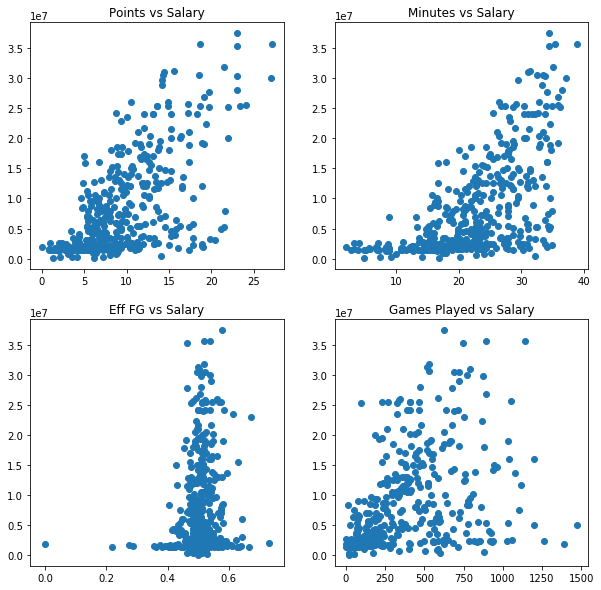

In [136]:
fig = plt.figure(figsize=(10,10))

plt1 = fig.add_subplot(2, 2, 1)
plt1.scatter(data.PPG, data.Salary)
plt1.set_title("Points vs Salary")

plt2 = fig.add_subplot(2, 2, 2)
plt2.scatter(data.MPG, data.Salary)
plt2.set_title("Minutes vs Salary")

plt3 = fig.add_subplot(2, 2, 3)
plt3.scatter(data.iloc[:, 24], data.Salary)
plt3.set_title("Eff FG vs Salary")

plt4 = fig.add_subplot(2, 2, 4)
plt4.scatter(data.GP, data.Salary)
plt4.set_title("Games Played vs Salary")

plt.show()

Try using a lienar regression model

In [137]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_predictions = linear_model.predict(x_test)
mean_absolute_error(y_test, linear_predictions)

4574490.837652994

In [138]:
from sklearn.ensemble import RandomForestRegressor

salary_model_2 = RandomForestRegressor()
salary_model_2.fit(x_train, y_train)

predictions2 = salary_model_2.predict(x_test)

print(mean_absolute_error(y_test, predictions2))

4301468.83974359
